# Linear Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score, cross_validate, learning_curve, ShuffleSplit

from sklearn.metrics import mean_squared_error

from sklearn.pipeline import Pipeline

from sklearn.preprocessing import StandardScaler


In [4]:
np.random.seed(306)

Setting random seed to 306

In [16]:
shuffle_split = ShuffleSplit(n_splits=10, test_size=0.2, random_state=0)
plt.style.use("ggplot")

shuffle_split create 10 folds through shuffle split by keeping aside 20% examples as test in each fold

# STEP 1 Load the dataset

In [11]:
import ssl
import urllib.request
from sklearn.datasets import fetch_california_housing

ssl._create_default_https_context = ssl._create_unverified_context

urllib.request.install_opener(
    urllib.request.build_opener(
        urllib.request.HTTPSHandler(context=ssl._create_default_https_context())
    )
)
features, labels = fetch_california_housing(as_frame=True, return_X_y=True)

print(features.head())
print(labels.head())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64


In [12]:
print("Shape of feature matrix", features.shape)
print("Shape of label vector", labels.shape)

Shape of feature matrix (20640, 8)
Shape of label vector (20640,)


# Step 02 Preprocessing

In [17]:
from sklearn.model_selection import train_test_split
train_features, test_features, train_labels, test_labels = train_test_split(
    features, labels, random_state=42
)

In [18]:
print("# training samples:", train_features.shape[0])
print('# test samples: ', test_features.shape[0])

# training samples: 15480
# test samples:  5160


In [19]:
assert(train_features.shape[0]==train_labels.shape[0])
assert(test_features.shape[0]==test_labels.shape[0])

In [20]:
lin_reg_pipeline = Pipeline( [ ('feature_scaling', StandardScaler()),
                               ('lin_reg', LinearRegression() ) 
                            ] )

lin_reg_pipeline.fit(train_features, train_labels)

Pipeline(steps=[('feature_scaling', StandardScaler()),
                ('lin_reg', LinearRegression())])

In [22]:
print('Intercept (w_0): ', lin_reg_pipeline[-1].intercept_)
print('Weight Vectors (w_1, w2 ... , w_m): ', lin_reg_pipeline[-1].coef_)

Intercept (w_0):  2.0703489205426377
Weight Vectors (w_1, w2 ... , w_m):  [ 0.85210815  0.12065533 -0.30210555  0.34860575 -0.00164465 -0.04116356
 -0.89314697 -0.86784046]


# Model Evaluation

In [23]:
test_score = lin_reg_pipeline.score(test_features, test_labels)
print('Model Performance on test set: ', test_score)

train_score = lin_reg_pipeline.score(train_features, train_labels)
print('Model Performance on train set', train_score)

Model Performance on test set:  0.591050979549135
Model Performance on train set 0.609873031052925


In [24]:
# Cross Validation

lin_reg_score = cross_val_score(lin_reg_pipeline, 
                                train_features, 
                                train_labels,
                                scoring='neg_mean_squared_error',
                                cv=shuffle_split)
print(lin_reg_score)

print("Score of linear regression model on test set")
print(f"{lin_reg_score.mean():.3f}+/-{lin_reg_score.std():.3f}")

[-0.50009976 -0.52183352 -0.55931218 -0.52110499 -0.56059203 -0.50510767
 -0.52386194 -0.54775518 -0.5007161  -0.54713448]
Score of linear regression model on test set
-0.529+/-0.022


In [25]:
lin_reg_mse = -lin_reg_score
print("Score of linear regression model on test set")
print(f"{lin_reg_mse.mean():.3f}+/-{lin_reg_mse.std():.3f}")

Score of linear regression model on test set
0.529+/-0.022


In [26]:
# Cross Validate

lin_reg_cv_results = cross_validate(lin_reg_pipeline,
                                    train_features, 
                                    train_labels,
                                    cv = shuffle_split,
                                    scoring='neg_mean_squared_error',
                                    return_estimator=True,
                                    return_train_score=True
                                    )

In [27]:
lin_reg_cv_results

{'fit_time': array([0.00798106, 0.00415897, 0.00282812, 0.00272894, 0.00372291,
        0.0034759 , 0.0060811 , 0.00217819, 0.00236511, 0.00204301]),
 'score_time': array([0.00130367, 0.00061417, 0.00052691, 0.00052524, 0.00555491,
        0.00060129, 0.00068092, 0.00052691, 0.00047112, 0.00041413]),
 'estimator': [Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('feature_scaling', StandardScaler()),
                  ('lin_reg', LinearRegression())]),
  Pipeline(steps=[('featu

In [28]:
train_error = -1 * lin_reg_cv_results['train_score']
test_error = -1 * lin_reg_cv_results['test_score']

print('Train Error')
print(f"{train_error.mean():.3f}+/-{train_error.std():.3f}")

print('Test Error')
print(f"{test_error.mean():.3f}+/-{test_error.std():.3f}")

Train Error
0.519+/-0.006
Test Error
0.529+/-0.022


In [29]:
best_model_index = np.argmin(test_error)
selected_model = lin_reg_cv_results['estimator'][best_model_index]

In [30]:
print('Intercept (w_0): ', selected_model[-1].intercept_)
print('Weight Vectors (w_1, w2 ... , w_m): ', selected_model[-1].coef_)

Intercept (w_0):  2.0779898917958657
Weight Vectors (w_1, w2 ... , w_m):  [ 8.44324888e-01  1.18463901e-01 -3.04619574e-01  3.56620503e-01
  1.74458509e-04 -4.23964612e-02 -8.96045642e-01 -8.68906479e-01]


In [31]:
from sklearn.model_selection import cross_val_predict

cv_predictions = cross_val_predict(lin_reg_pipeline, train_features, train_labels)

mse_cv = mean_squared_error(train_labels, cv_predictions)

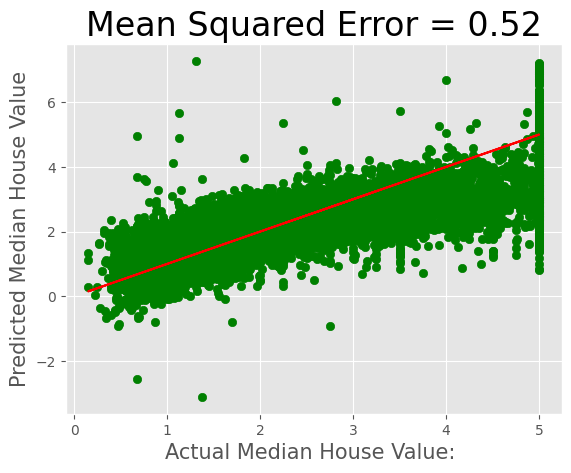

In [32]:
plt.scatter(train_labels, cv_predictions, color='green')
plt.plot(train_labels, train_labels, 'r-')
plt.title(f'Mean Squared Error = {mse_cv:.2f}', size=24)
plt.xlabel('Actual Median House Value: ', size=15)
plt.ylabel('Predicted Median House Value', size=15)
plt.show()

# Predictions


In [33]:
test_predictions_cv = selected_model.predict(test_features)
test_predictions_cv[:5]

array([0.73548515, 1.7725621 , 2.70011199, 2.83716602, 2.60743151])

In [34]:
test_predictions_cv = lin_reg_pipeline.predict(test_features)
test_predictions_cv[:5]

array([0.72412832, 1.76677807, 2.71151581, 2.83601179, 2.603755  ])

# Model Performance

In [35]:
score_cv = selected_model.score(test_features, test_labels)
score = lin_reg_pipeline.score(test_features, test_labels)

print('R2 Score for best model obtained via cross validation: ', score_cv)
print('R2 Score for best model obtained without: ', score)

R2 Score for best model obtained via cross validation:  0.5923577635319087
R2 Score for best model obtained without:  0.591050979549135


In [38]:
# mse_cv = mean_squared_error(test_features, test_labels)
# mse = mean_squared_error(test_features, test_labels)

# print('MSE Score for best model obtained via cross validation: ', mse_cv)
# print('MSE Score for best model obtained without: ', mse)